# Diamonds Case Exploratory Data Analysis

In [13]:
# Importing libraries
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

In [14]:
# Reading and viewing the data
file = pd.read_csv('diamonds.csv')
file

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [15]:
# Removing the extra index column
file.drop('Unnamed: 0', inplace=True, axis=1)
file.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
file.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
# Checking for missing nalues
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


There are no null values in the dataset

In [18]:
# Checking if there are any typos in the categorical columns
a=file['cut'].unique()
b=file['color'].unique()
c=file['clarity'].unique()
print(a,'\n',b,'\n',c)

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair'] 
 ['E' 'I' 'J' 'H' 'F' 'G' 'D'] 
 ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Removing outliers

In [19]:
for x in ['x','y','z']:
    q1 = file[x].quantile(0.25)                 
    q3 = file[x].quantile(0.75)
    iqr = q3 - q1
    filter = (file[x] >= q1 - iqr*1.5) & (file[x] <= q3 + 1.5*iqr)
    file = file.loc[filter] 

file

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [20]:
# Replacing the 'clarity' column values with number grades
list2 = ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1','I2','I3']
replacelist2 = [str(i+1)+':'+list2[i] for i in range(len(list2))]

for i in range(len(list2)):
    file=file.replace(list2[i],replacelist2[i])

file

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,7:SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,6:SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,4:VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,5:VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,7:SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,6:SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,6:SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,6:SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,7:SI2,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
# Replacing the 'cut' column values with number grades
list1 = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
replacelist = [str(i+1)+':'+list1[i] for i in range(len(list1))]
for i in range(len(list1)):
    file=file.replace(list1[i],replacelist[i])
file

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5:Ideal,E,7:SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4:Premium,E,6:SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2:Good,E,4:VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4:Premium,I,5:VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2:Good,J,7:SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5:Ideal,D,6:SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2:Good,D,6:SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3:Very Good,D,6:SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4:Premium,H,7:SI2,61.0,58.0,2757,6.15,6.12,3.74


## Univariate Analysis

### Pie charts

Enter the column name for which you would like to see a pie chart out of "cut","color", and "clarity": clarity


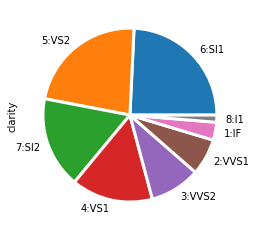

In [22]:
# Defining a function to plot a piechart
def piech(variable):
    file[variable].value_counts(normalize=True).plot.pie(wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
    plt.show()
# Taking an input for the name of the column for which the piechart will be plotted, and plotting the piechart
variable = input('Enter the column name for which you would like to see a pie chart out of "cut","color", and "clarity": ')
assert variable in ['cut','color','clarity'], 'Please enter the name of a categorical column'
piech(variable)

### Scatter plots

Enter the column you wish to see the distribution of: cut


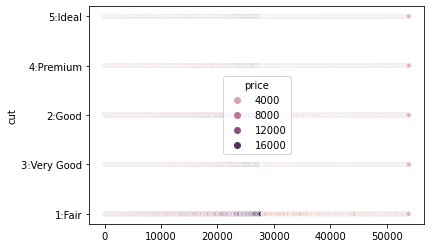

In [24]:
scatvar = input('Enter the column you wish to see the distribution of: ')
def scat(variable):
    sns.scatterplot(x=file.index,y=file[variable],hue=file['price'],s=20)
scat(scatvar)

In [ ]:
# plt.rcParams['figure.figsize'] = (12.0, 7.5)
# file.plot(kind='hist',y='price')
# plt.ylabel('Price')
# plt.xlabel(x)
# plt.show

## Bivariate analysis

### Scatterplots wrt price

In [ ]:
# Defining a function that takes the column names as input and returns a scatter plot wrt price
def scatter(x):
    plt.rcParams['figure.figsize'] = (12.0, 7.5)
    plt.scatter(file[column],file['price'],color='teal',s=3)
    plt.ylabel('Price')
    plt.xlabel(x)
    plt.show
column = input('Enter the metric name for which you would like to see a relation wrt price: ')
scatter(column)

### Correlation matrices

In [ ]:
p = input('Enter the first metric to compare: ')
q = input('Enter the second metric to compare: ')
r = input('Enter the third metric to compare: ')

def corrm(p,q,r):
    # Creating a matrix using p, q, r as rows and columns
    fl = file[[p,q,r]].corr()
    sns.heatmap(fl.corr(), annot=True, cmap = 'coolwarm')
    plt.show()
corrm(p,q,r)

## Multivariate Analysis

### Heat Maps

#### Creating a heatmap with price as the value and two other columns as the index and data

In [ ]:
# Taking the input for the metrics to compare
metric1 = input('Enter the first metric you would like to compare: ')
metric2 = input('Enter the second metric you would like to compare: ')

# Defining a function that produces the heatmap
def tempplot(l,m):
    tempplot = pd.pivot_table(data=file, index=l, columns=m,values='price')
    plt.rcParams['figure.figsize'] = (16.0, 10.0)
    sns.heatmap(tempplot, annot=False, cmap = 'coolwarm', center=0.117)
    plt.show()
tempplot(metric1,metric2)   

#### Creating a heatmap with carat as the value and two other columns as the index and data

In [ ]:
# Taking the input for the metrics to compare
metric1 = input('Enter the first metric you would like to compare: ')
metric2 = input('Enter the second metric you would like to compare: ')

# Defining a function that produces the heatmap
def tempplot(l,m):
    tempplot = pd.pivot_table(data=file, index=l, columns=m,values='carat')
    plt.rcParams['figure.figsize'] = (16.0, 10.0)
    sns.heatmap(tempplot, annot=False, cmap = 'coolwarm', center=0.117)
    plt.show()
tempplot(metric1,metric2) 